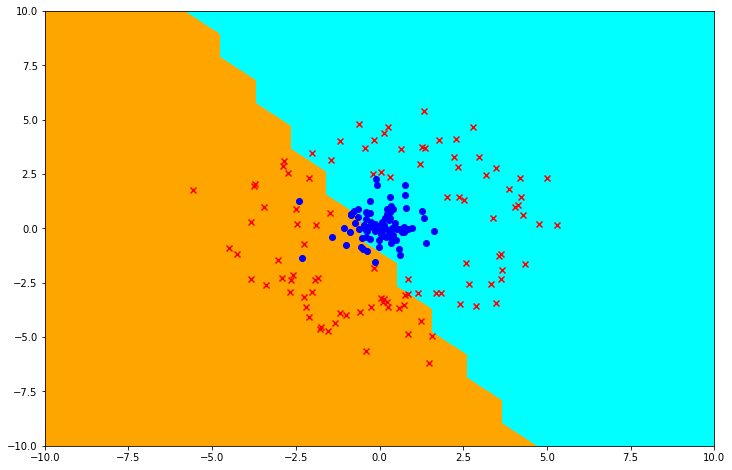

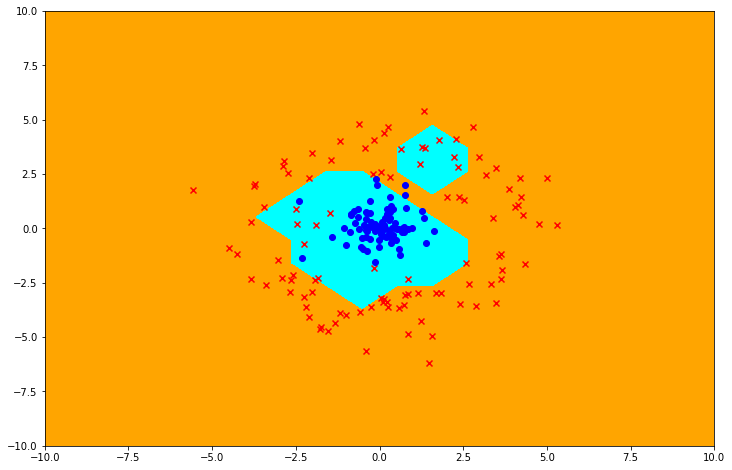

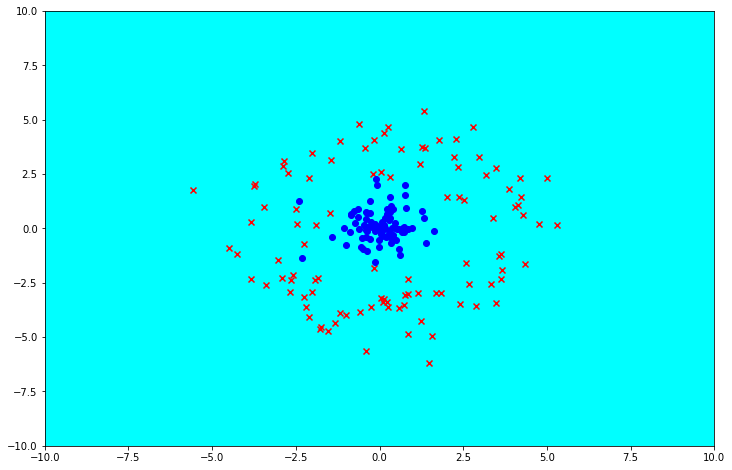

In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np

import util


def initial_state():
    """Return the initial state for the perceptron.

    This function computes and then returns the initial state of the perceptron.
    Feel free to use any data type (dicts, lists, tuples, or custom classes) to
    contain the state of the perceptron.

    """

    # *** START CODE HERE ***
    state = [[],[]]
    return state
    # *** END CODE HERE ***


def predict(state, kernel, x_i):
    """Peform a prediction on a given instance x_i given the current state
    and the kernel.

    Args:
        state: The state returned from initial_state()
        kernel: A binary function that takes two vectors as input and returns
            the result of a kernel
        x_i: A vector containing the features for a single instance

    Returns:
        Returns the prediction (i.e 0 or 1)
    """
    # *** START CODE HERE ***
    prdction = 0
    x_vec = state[0] 
    betas = state[1]
    for j in range(len(x_vec)):
        prdction+= betas[j]*kernel(x_vec[j],x_i)
    return sign(prdction)
    # *** END CODE HERE ***


def update_state(state, kernel, learning_rate, x_i, y_i):
    """Updates the state of the perceptron.

    Args:
        state: The state returned from initial_state()
        kernel: A binary function that takes two vectors as input and returns the result of a kernel
        learning_rate: The learning rate for the update
        x_i: A vector containing the features for a single instance
        y_i: A 0 or 1 indicating the label for a single instance
    """
    # *** START CODE HERE ***
    prdc = predict(state,kernel,x_i)
    beta_i = learning_rate*(y_i - prdc)
    x = state[0]
    betas = state[1]
    x.append(x_i)
    betas.append(beta_i)
    state=[x,betas]
    # *** END CODE HERE ***


def sign(a):
    """Gets the sign of a scalar input."""
    if a >= 0:
        return 1
    else:
        return 0


def dot_kernel(a, b):
    """An implementation of a dot product kernel.

    Args:
        a: A vector
        b: A vector
    """
    return np.dot(a, b)


def rbf_kernel(a, b, sigma=1):
    """An implementation of the radial basis function kernel.

    Args:
        a: A vector
        b: A vector
        sigma: The radius of the kernel
    """
    distance = (a - b).dot(a - b)
    scaled_distance = -distance / (2 * (sigma) ** 2)
    return math.exp(scaled_distance)

def non_psd_kernel(a, b):
    """An implementation of a non-psd kernel.

    Args:
        a: A vector
        b: A vector
    """
    if(np.allclose(a,b,rtol=1e-5)):
        return -1
    return 0

def train_perceptron(kernel_name, kernel, learning_rate):
    """Train a perceptron with the given kernel.

    This function trains a perceptron with a given kernel and then
    uses that perceptron to make predictions.
    The output predictions are saved to src/perceptron/perceptron_{kernel_name}_predictions.txt.
    The output plots are saved to src/perceptron/perceptron_{kernel_name}_output.pdf.

    Args:
        kernel_name: The name of the kernel.
        kernel: The kernel function.
        learning_rate: The learning rate for training.
    """
    train_x, train_y = util.load_csv('train.csv')

    state = initial_state()

    for x_i, y_i in zip(train_x, train_y):
        update_state(state, kernel, learning_rate, x_i, y_i)

    test_x, test_y = util.load_csv('test.csv')

    plt.figure(figsize=(12, 8))
    util.plot_contour(lambda a: predict(state, kernel, a))
    util.plot_points(test_x, test_y)
    plt.savefig('perceptron_{}_output.png'.format(kernel_name))

    predict_y = [predict(state, kernel, test_x[i, :]) for i in range(test_y.shape[0])]

    np.savetxt('perceptron_{}_predictions'.format(kernel_name), predict_y)


def main():
    train_perceptron('dot', dot_kernel, 0.5)
    train_perceptron('rbf', rbf_kernel, 0.5)
    train_perceptron('non_psd', non_psd_kernel, 0.5)
    plt.show()



if __name__ == "__main__":
    main()
